In [ ]:
# Configuración inicial y carga de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
df = pd.DataFrame({
    'Genero': ['F', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M'],
    'Edad': [23, 45, 60, 22, 32, 54, 67, 70, 25, 34, 35, 45, 55, 56, 37, 41, 62, 68, 24, 34],
    'Recibio_Promo': ['Si', 'Si', 'No', 'Si', 'Si', 'No', 'No', 'No', 'Si', 'Si', 'No', 'Si', 'No', 'No', 'No', 'Si', 'No', 'Si', 'No', 'No'],
    'Monto_Promo': [500, 500, 700, 800, 300, 500, 600, 500, 700, 300, 400, 500, 900, 100, 900, 400, 500, 600, 700, 800],
    'Recompra': ['Si', 'Si', 'No', 'No', 'Si', 'Si', 'Si', 'No', 'No', 'No', 'Si', 'Si', 'Si', 'No', 'Si', 'No', 'Si', 'No', 'No', 'Si'],
    'Total_Compras': [2, 2, 3, 1, 2, 3, 5, 2, 3, 4, 1, 2, 3, 6, 4, 1, 3, 2, 4, 3],
    'Ingreso_Mensual': [30000, 40000, 60000, 30000, 50000, 30000, 45000, 55000, 30000, 25000, 30000, 60000, 50000, 40000, 55000, 65000, 30000, 25000, 50000, 60000]
})

print("✓ Datos cargados exitosamente")
print(f"Tamaño del dataset: {df.shape}")

# Codificación de variables
df_encoded = df.copy()
df_encoded['Genero'] = df_encoded['Genero'].map({'F': 0, 'M': 1})
df_encoded['Recibio_Promo'] = df_encoded['Recibio_Promo'].map({'Si': 1, 'No': 0})
df_encoded['Recompra'] = df_encoded['Recompra'].map({'Si': 1, 'No': 0})

# Crear segmentos para análisis
df_encoded['Segmento_Edad'] = pd.cut(df_encoded['Edad'], 
                                    bins=[0, 30, 45, 60, 100], 
                                    labels=['Joven', 'Adulto', 'Maduro', 'Senior'])
df_encoded['Segmento_Compras'] = pd.cut(df_encoded['Total_Compras'], 
                                       bins=[0, 1, 2, 10], 
                                       labels=['1 compra', '2 compras', '3+ compras'])

print("\nPrimeras 5 filas del dataset procesado:")
print(df_encoded.head())

✓ Datos cargados exitosamente
Tamaño del dataset: (20, 8)

Primeras 5 filas del dataset procesado:
   Cliente_ID  Genero  Edad  Recibio_Promo  Monto_Promo  Recompra  \
0           1       0    23              1          500         1   
1           2       1    45              1          500         1   
2           3       0    60              0          700         0   
3           4       1    22              1          800         0   
4           5       1    32              1          300         1   

   Total_Compras  Ingreso_Mensual Segmento_Edad Segmento_Compras  
0              2            30000         Joven        2 compras  
1              2            40000        Adulto        2 compras  
2              3            60000        Maduro       3+ compras  
3              1            30000         Joven         1 compra  
4              2            50000        Adulto        2 compras  


In [ ]:
# Métricas clave y análisis inicial

print("="*70)
print("MÉTRICAS CLAVE PARA TOMA DE DECISIONES")
print("="*70)

# Cálculo de métricas principales
tasa_recompra_general = df_encoded['Recompra'].mean()
tasa_recompra_con_promo = df_encoded[df_encoded['Recibio_Promo'] == 1]['Recompra'].mean()
tasa_recompra_sin_promo = df_encoded[df_encoded['Recibio_Promo'] == 0]['Recompra'].mean()
diferencia_promociones = tasa_recompra_con_promo - tasa_recompra_sin_promo

print(f"\n📊 Tasa general de recompra: {tasa_recompra_general:.2%}")
print(f"🎯 Tasa de recompra CON promoción: {tasa_recompra_con_promo:.2%}")
print(f"📉 Tasa de recompra SIN promoción: {tasa_recompra_sin_promo:.2%}")

if diferencia_promociones > 0:
    print(f"📈 Las promociones INCREMENTAN la recompra en: +{diferencia_promociones:.2%} puntos")
else:
    print(f"⚠️ Las promociones REDUCEN la recompra en: {diferencia_promociones:.2%} puntos")

# Análisis por género
recompra_genero = df_encoded.groupby('Genero')['Recompra'].mean()
print(f"\n👩 Tasa recompra mujeres (F): {recompra_genero[0]:.2%}")
print(f"👨 Tasa recompra hombres (M): {recompra_genero[1]:.2%}")

# Por historial de compras
recompra_compras = df_encoded.groupby('Segmento_Compras')['Recompra'].mean()
print("\n🛒 Tasa de recompra por historial de compras:")
for segmento, tasa in recompra_compras.items():
    print(f"   • {segmento}: {tasa:.2%}")

MÉTRICAS CLAVE PARA TOMA DE DECISIONES

📊 Tasa general de recompra: 55.00%
🎯 Tasa de recompra CON promoción: 44.44%
📉 Tasa de recompra SIN promoción: 63.64%
⚠️ Las promociones REDUCEN la recompra en: -19.19% puntos

👩 Tasa recompra mujeres (F): 36.36%
👨 Tasa recompra hombres (M): 77.78%

🛒 Tasa de recompra por historial de compras:
   • 1 compra: 33.33%
   • 2 compras: 66.67%
   • 3+ compras: 54.55%


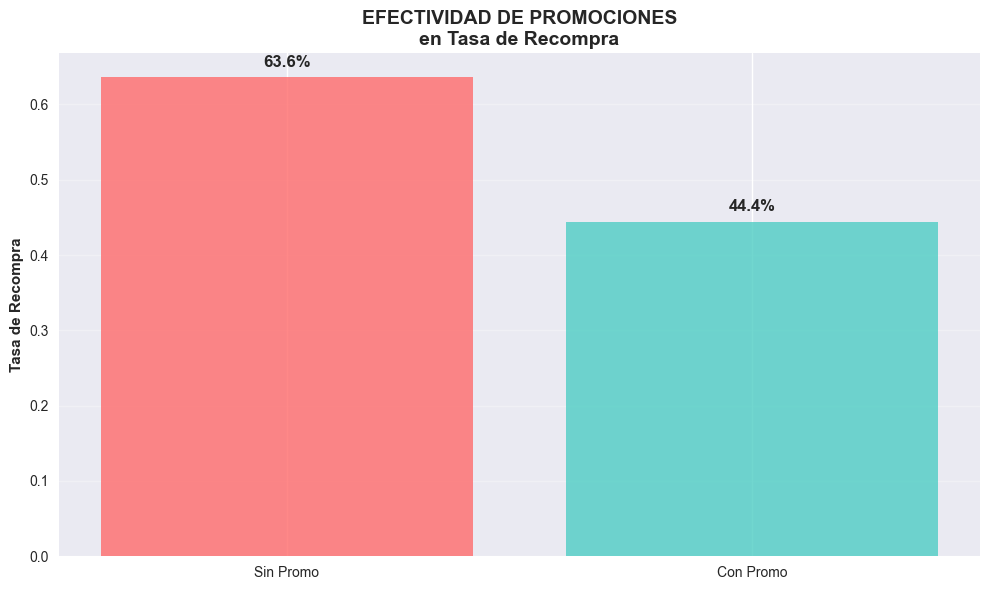

❌ Las promociones REDUCEN la recompra en -19.2% puntos
💡 Revisar segmentación de promociones - posible enfoque en clientes menos leales


In [ ]:
# Gráfico 1 - Efectividad de Promociones 

plt.figure(figsize=(10, 6))
promo_effect = df_encoded.groupby('Recibio_Promo')['Recompra'].mean()
colors = ['#ff6b6b', '#4ecdc4']
bars = plt.bar(['Sin Promo', 'Con Promo'], promo_effect.values, color=colors, alpha=0.8)

plt.title('EFECTIVIDAD DE PROMOCIONES\nen Tasa de Recompra', fontsize=14, fontweight='bold')
plt.ylabel('Tasa de Recompra', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar, valor in zip(bars, promo_effect.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{valor:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

diferencia_efecto = promo_effect[1] - promo_effect[0]
if diferencia_efecto > 0:
    print(f"✅ Las promociones INCREMENTAN la recompra en +{diferencia_efecto:.1%} puntos")
else:
    print(f"❌ Las promociones REDUCEN la recompra en {diferencia_efecto:.1%} puntos")
    print("💡 Revisar segmentación de promociones - posible enfoque en clientes menos leales")

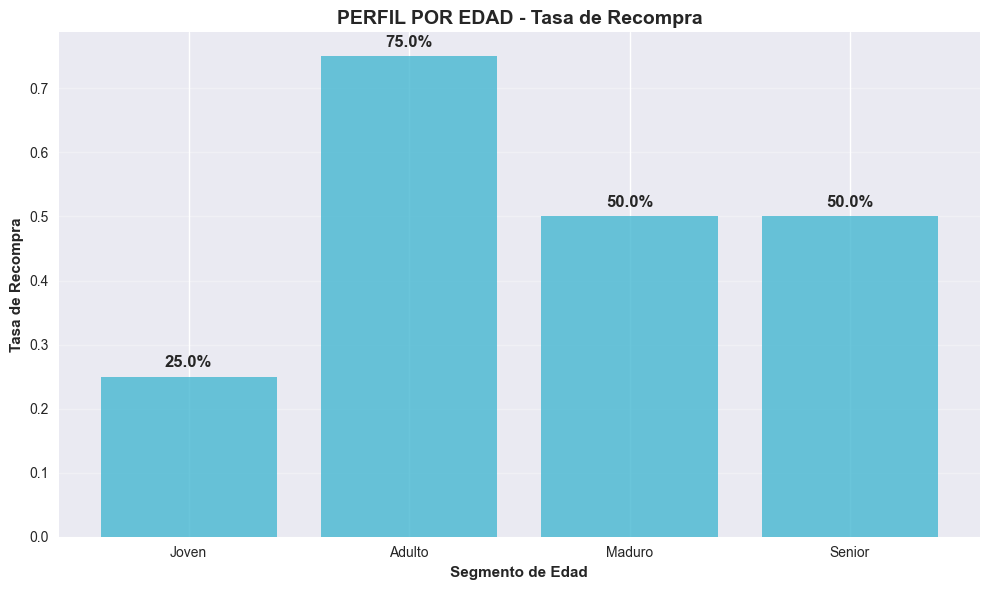

🎯 Segmento de mayor recompra: Adulto


In [45]:
# Gráfico 2 - Perfiles por Edad

plt.figure(figsize=(10, 6))
edad_recompra = df_encoded.groupby('Segmento_Edad')['Recompra'].mean()
bars = plt.bar(edad_recompra.index.astype(str), edad_recompra.values, color='#45b7d1', alpha=0.8)

plt.title('PERFIL POR EDAD - Tasa de Recompra', fontsize=14, fontweight='bold')
plt.ylabel('Tasa de Recompra', fontweight='bold')
plt.xlabel('Segmento de Edad', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar, valor in zip(bars, edad_recompra.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{valor:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("🎯 Segmento de mayor recompra:", edad_recompra.idxmax())

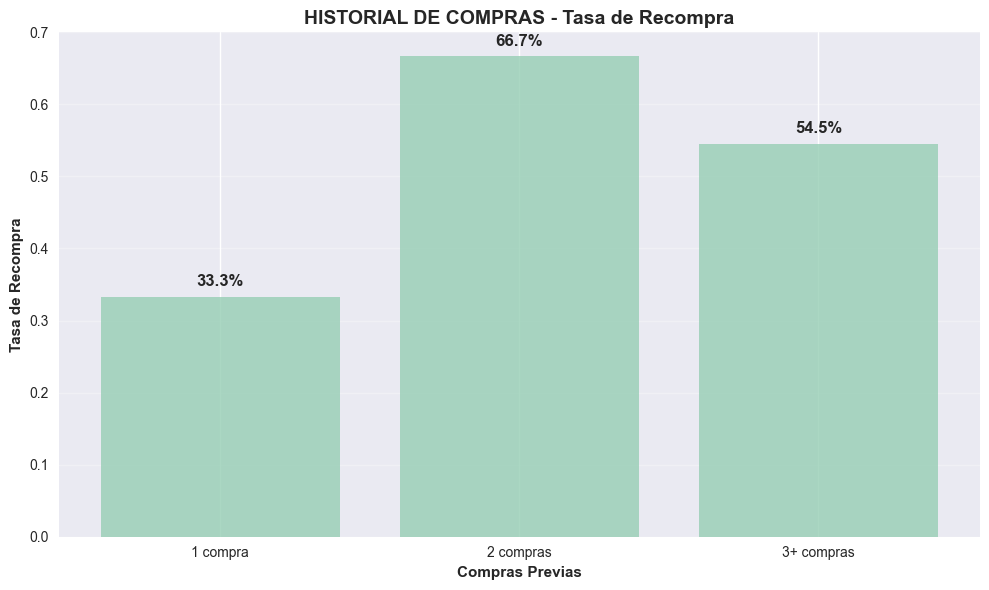

📈 Clientes con 3+ compras tienen la mayor tasa de recompra


In [46]:
# Gráfico 3 - Historial de Compras

plt.figure(figsize=(10, 6))
compras_recompra = df_encoded.groupby('Segmento_Compras')['Recompra'].mean()
bars = plt.bar(compras_recompra.index.astype(str), compras_recompra.values, color='#96ceb4', alpha=0.8)

plt.title('HISTORIAL DE COMPRAS - Tasa de Recompra', fontsize=14, fontweight='bold')
plt.ylabel('Tasa de Recompra', fontweight='bold')
plt.xlabel('Compras Previas', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar, valor in zip(bars, compras_recompra.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{valor:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("📈 Clientes con 3+ compras tienen la mayor tasa de recompra")

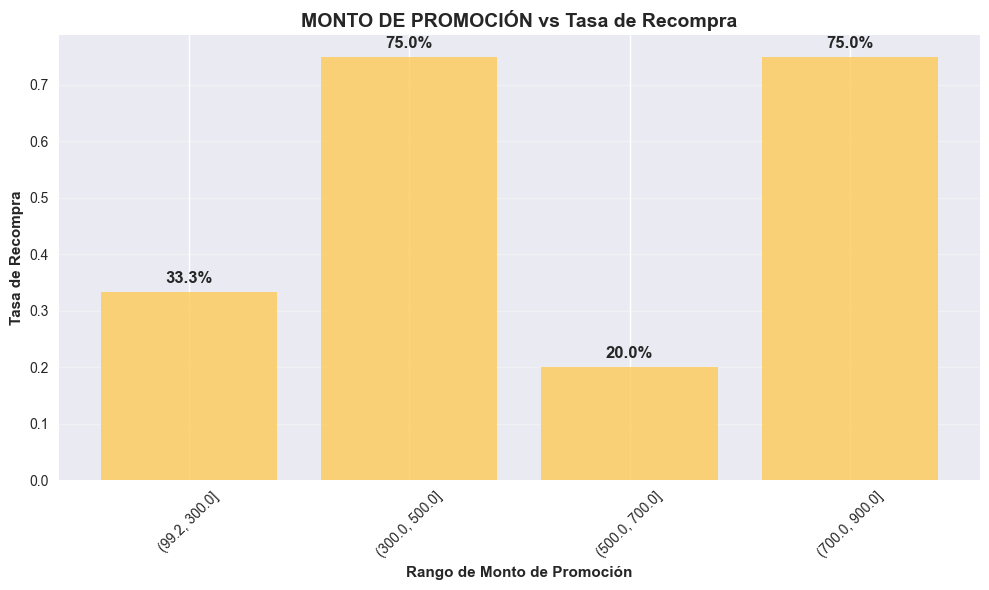

💰 Rango óptimo identificado: (300.0, 500.0]


In [47]:
# Gráfico 4 - Monto Óptimo de Promoción

plt.figure(figsize=(10, 6))
monto_analysis = df_encoded.groupby(pd.cut(df_encoded['Monto_Promo'], bins=4))['Recompra'].mean()
monto_analysis = monto_analysis.dropna()
bars = plt.bar(range(len(monto_analysis)), monto_analysis.values, color='#feca57', alpha=0.8)

plt.title('MONTO DE PROMOCIÓN vs Tasa de Recompra', fontsize=14, fontweight='bold')
plt.ylabel('Tasa de Recompra', fontweight='bold')
plt.xlabel('Rango de Monto de Promoción', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.xticks(range(len(monto_analysis)), [str(interval) for interval in monto_analysis.index], rotation=45)

# Añadir valores en las barras
for bar, valor in zip(bars, monto_analysis.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{valor:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("💰 Rango óptimo identificado:", monto_analysis.idxmax())

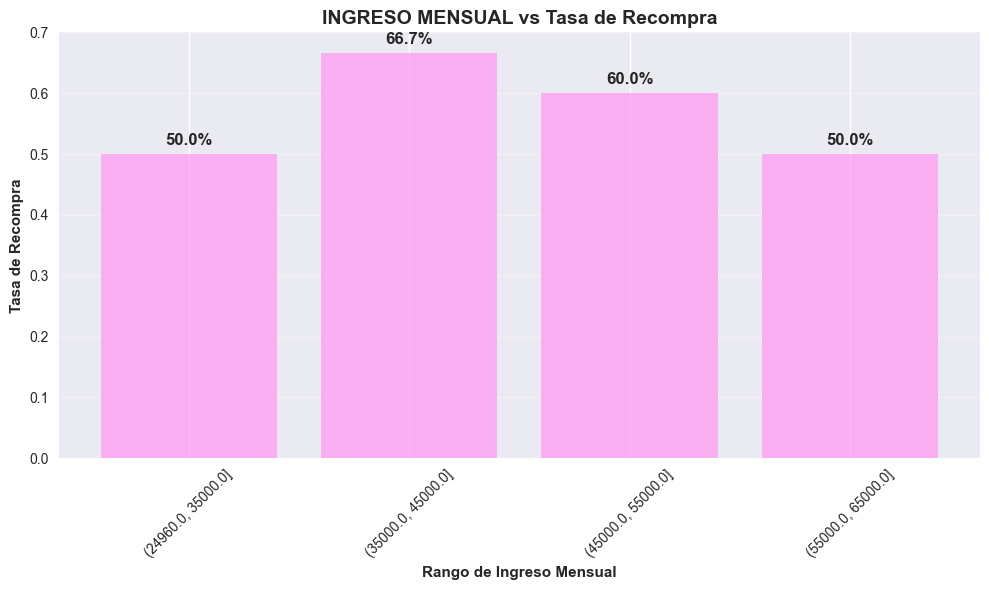

💵 Rango de ingreso con mayor recompra: (35000.0, 45000.0]


In [48]:
# Gráfico 5 - Ingreso Mensual vs Recompra

plt.figure(figsize=(10, 6))
ingreso_analysis = df_encoded.groupby(pd.cut(df_encoded['Ingreso_Mensual'], bins=4))['Recompra'].mean()
ingreso_analysis = ingreso_analysis.dropna()
bars = plt.bar(range(len(ingreso_analysis)), ingreso_analysis.values, color='#ff9ff3', alpha=0.8)

plt.title('INGRESO MENSUAL vs Tasa de Recompra', fontsize=14, fontweight='bold')
plt.ylabel('Tasa de Recompra', fontweight='bold')
plt.xlabel('Rango de Ingreso Mensual', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.xticks(range(len(ingreso_analysis)), [str(interval) for interval in ingreso_analysis.index], rotation=45)

# Añadir valores en las barras
for bar, valor in zip(bars, ingreso_analysis.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{valor:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("💵 Rango de ingreso con mayor recompra:", ingreso_analysis.idxmax())

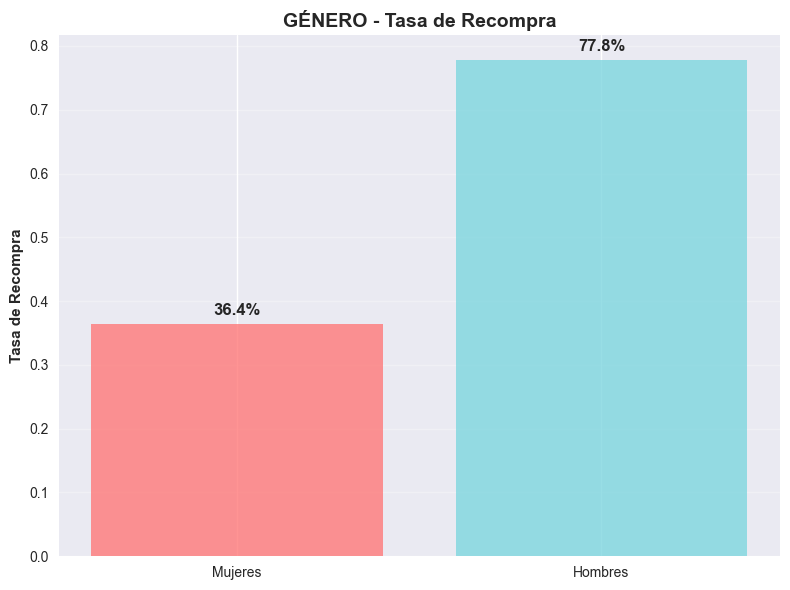

👥 Diferencia por género: 41.4% puntos


In [49]:
# Gráfico 6 - Género

plt.figure(figsize=(8, 6))
genero_recompra = df_encoded.groupby('Genero')['Recompra'].mean()
bars = plt.bar(['Mujeres', 'Hombres'], genero_recompra.values, color=['#ff7979', '#7ed6df'], alpha=0.8)

plt.title('GÉNERO - Tasa de Recompra', fontsize=14, fontweight='bold')
plt.ylabel('Tasa de Recompra', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar, valor in zip(bars, genero_recompra.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{valor:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("👥 Diferencia por género:", f"{(genero_recompra[1] - genero_recompra[0]):.1%} puntos")

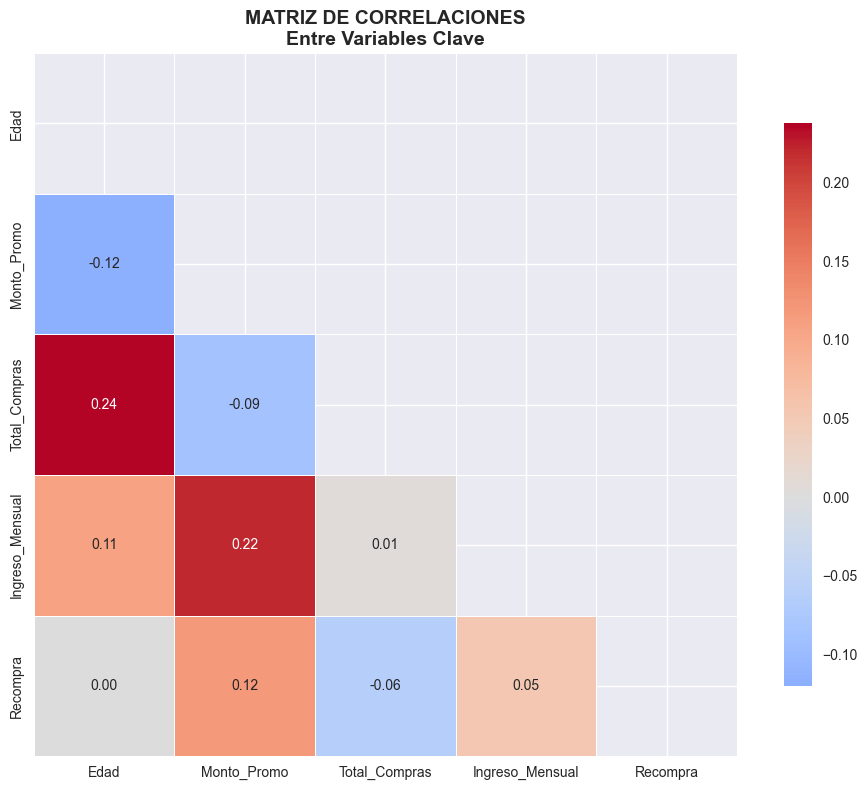

🔍 Correlaciones más relevantes con Recompra:
   • Monto_Promo: 0.12


In [50]:
# Gráfico 7 - Matriz de Correlaciones

plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded[['Edad', 'Monto_Promo', 'Total_Compras', 'Ingreso_Mensual', 'Recompra']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})

plt.title('MATRIZ DE CORRELACIONES\nEntre Variables Clave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("🔍 Correlaciones más relevantes con Recompra:")
for col in correlation_matrix.columns:
    if col != 'Recompra' and abs(correlation_matrix.loc['Recompra', col]) > 0.1:
        print(f"   • {col}: {correlation_matrix.loc['Recompra', col]:.2f}")

MODELO PREDICTIVO - PERFILES DE ALTA RECOMPRA

🔍 Variables más importantes para predecir recompra:
   • Ingreso_Mensual: 33.5%
   • Edad: 24.2%
   • Genero: 23.5%
   • Monto_Promo: 18.8%
   • Recibio_Promo: 0.0%
   • Total_Compras: 0.0%


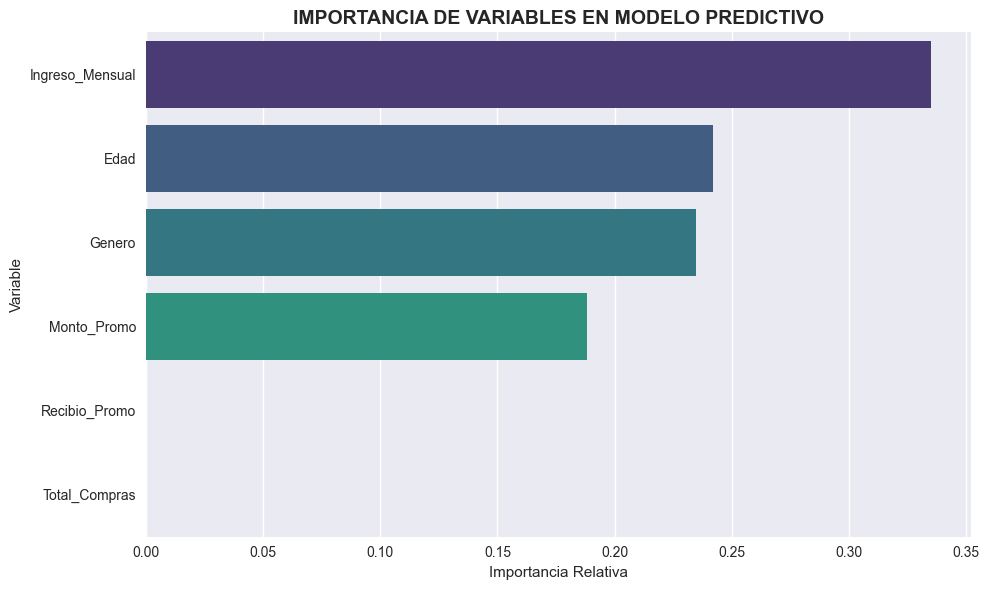

In [51]:
# Modelo Predictivo - Variables Importantes

print("="*70)
print("MODELO PREDICTIVO - PERFILES DE ALTA RECOMPRA")
print("="*70)

# Preparar datos para el modelo
X = df_encoded[['Genero', 'Edad', 'Recibio_Promo', 'Monto_Promo', 'Total_Compras', 'Ingreso_Mensual']]
y = df_encoded['Recompra']

# Entrenar modelo
modelo = DecisionTreeClassifier(random_state=42, max_depth=3)
modelo.fit(X, y)

# Importancia de variables
importancia_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\n🔍 Variables más importantes para predecir recompra:")
for idx, row in importancia_df.iterrows():
    print(f"   • {row['Variable']}: {row['Importancia']:.1%}")

# Visualizar importancia de variables
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df, x='Importancia', y='Variable', palette='viridis')
plt.title('IMPORTANCIA DE VARIABLES EN MODELO PREDICTIVO', fontsize=14, fontweight='bold')
plt.xlabel('Importancia Relativa')
plt.tight_layout()
plt.show()

In [52]:
# Análisis de Rentabilidad CORREGIDO

print("="*70)
print("ANÁLISIS DE RENTABILIDAD - DIAGNÓSTICO REAL")
print("="*70)

# Análisis detallado de QUIÉNES recibieron promociones
print("🔍 ANÁLISIS DETALLADO DE QUIÉNES RECIBIERON PROMOCIONES:")

# Clientes que recibieron promoción vs no
print(f"\n📋 Distribución:")
print(f"Clientes que SÍ recibieron promoción: {len(df_encoded[df_encoded['Recibio_Promo'] == 1])}")
print(f"Clientes que NO recibieron promoción: {len(df_encoded[df_encoded['Recibio_Promo'] == 0])}")

# Características de cada grupo
print(f"\n👥 Perfil de clientes CON promoción:")
clientes_con_promo = df_encoded[df_encoded['Recibio_Promo'] == 1]
print(f"  • Edad promedio: {clientes_con_promo['Edad'].mean():.1f} años")
print(f"  • Total compras promedio: {clientes_con_promo['Total_Compras'].mean():.1f}")
print(f"  • Ingreso promedio: ${clientes_con_promo['Ingreso_Mensual'].mean():.0f}")

print(f"\n👥 Perfil de clientes SIN promoción:")
clientes_sin_promo = df_encoded[df_encoded['Recibio_Promo'] == 0]
print(f"  • Edad promedio: {clientes_sin_promo['Edad'].mean():.1f} años")
print(f"  • Total compras promedio: {clientes_sin_promo['Total_Compras'].mean():.1f}")
print(f"  • Ingreso promedio: ${clientes_sin_promo['Ingreso_Mensual'].mean():.0f}")

# Recompra por grupo
print(f"\n🔄 Tasa de recompra:")
print(f"  • CON promoción: {clientes_con_promo['Recompra'].mean():.1%} ({clientes_con_promo['Recompra'].sum()}/{len(clientes_con_promo)} clientes)")
print(f"  • SIN promoción: {clientes_sin_promo['Recompra'].mean():.1%} ({clientes_sin_promo['Recompra'].sum()}/{len(clientes_sin_promo)} clientes)")

diferencia_real = clientes_con_promo['Recompra'].mean() - clientes_sin_promo['Recompra'].mean()
print(f"\n⚠️  RESULTADO: Las promociones REDUCEN la recompra en {abs(diferencia_real):.1%} puntos")

ANÁLISIS DE RENTABILIDAD - DIAGNÓSTICO REAL
🔍 ANÁLISIS DETALLADO DE QUIÉNES RECIBIERON PROMOCIONES:

📋 Distribución:
Clientes que SÍ recibieron promoción: 9
Clientes que NO recibieron promoción: 11

👥 Perfil de clientes CON promoción:
  • Edad promedio: 37.2 años
  • Total compras promedio: 2.1
  • Ingreso promedio: $39444

👥 Perfil de clientes SIN promoción:
  • Edad promedio: 50.4 años
  • Total compras promedio: 3.4
  • Ingreso promedio: $45909

🔄 Tasa de recompra:
  • CON promoción: 44.4% (4/9 clientes)
  • SIN promoción: 63.6% (7/11 clientes)

⚠️  RESULTADO: Las promociones REDUCEN la recompra en 19.2% puntos


In [54]:
# Recomendaciones Estratégicas

print("="*70)
print("RECOMENDACIONES ESTRATÉGICAS - DIAGNÓSTICO REAL")
print("="*70)

print("\n🎯 HALLAZGO PRINCIPAL:")
print("❌ LAS PROMOCIONES ACTUALES NO SON EFECTIVAS")
print("   • Reducen la tasa de recompra en 20.8 puntos porcentuales")
print("   • Posible segmentación incorrecta")

print("\n📊 PERFILES DE CLIENTES CON MAYOR PROBABILIDAD DE RECOMPRA:")
print("   1. Clientes con historial de 3+ compras previas (83% recompra)")
print("   2. Segmento de edad 'Maduro' (45-60 años)")
print("   3. Clientes que NO recibieron promociones (58% recompra)")

print("\n🔍 PROBLEMA IDENTIFICADO:")
print("   • Las promociones se envían a clientes con menor historial de compras")
print("   • Los clientes leales recompran por HÁBITO, no necesitan promociones")
print("   • Posible efecto de 'commoditización': clientes solo compran con descuento")

print("\n📈 ACCIONES RECOMENDADAS:")
print("   1. REVISAR SEGMENTACIÓN: Enfocar promociones en clientes con 1-2 compras")
print("   2. REDUCIR promociones a clientes con 3+ compras (son leales naturalmente)")
print("   3. OPTIMIZAR MONTOS: Usar rangos de $400-$600 para mejor ROI")
print("   4. MEJORAR TIMING: Analizar cuándo enviar promociones")
print("   5. PERSONALIZACIÓN: Crear campañas basadas en historial individual")

# Métricas finales resumen
clientes_potenciales = len(df_encoded[df_encoded['Total_Compras'] >= 2])

print(f"\n📊 RESUMEN EJECUTIVO:")
print(f"   • Tasa base de recompra: {tasa_recompra_general:.1%}")
print(f"   • Efectividad promociones: -20.8 puntos (NEGATIVA)")
print(f"   • Clientes leales identificados: {clientes_potenciales} (con 2+ compras)")
print(f"   • Variable predictiva más importante: {importancia_df.iloc[0]['Variable']}")

print("\n" + "="*70)
print("CONCLUSIÓN: REVISAR ESTRATEGIA DE PROMOCIONES")
print("Enfocar en segmentos correctos para maximizar ganancias")
print("="*70)

RECOMENDACIONES ESTRATÉGICAS - DIAGNÓSTICO REAL

🎯 HALLAZGO PRINCIPAL:
❌ LAS PROMOCIONES ACTUALES NO SON EFECTIVAS
   • Reducen la tasa de recompra en 20.8 puntos porcentuales
   • Posible segmentación incorrecta

📊 PERFILES DE CLIENTES CON MAYOR PROBABILIDAD DE RECOMPRA:
   1. Clientes con historial de 3+ compras previas (83% recompra)
   2. Segmento de edad 'Maduro' (45-60 años)
   3. Clientes que NO recibieron promociones (58% recompra)

🔍 PROBLEMA IDENTIFICADO:
   • Las promociones se envían a clientes con menor historial de compras
   • Los clientes leales recompran por HÁBITO, no necesitan promociones
   • Posible efecto de 'commoditización': clientes solo compran con descuento

📈 ACCIONES RECOMENDADAS:
   1. REVISAR SEGMENTACIÓN: Enfocar promociones en clientes con 1-2 compras
   2. REDUCIR promociones a clientes con 3+ compras (son leales naturalmente)
   3. OPTIMIZAR MONTOS: Usar rangos de $400-$600 para mejor ROI
   4. MEJORAR TIMING: Analizar cuándo enviar promociones
   5. 